In [1]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np

In [2]:
box_label = [81,88,522,408]
box_pred = [x - 50 for x in box_label]
image_path = "/content/raccoon-1.jpg"
label = "raccoon"
rectangle_color1 = (0,0,255)
rectangle_color2 = (255,0,0)
rectangle_thickness = 2
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
text1_x = box_label[0]
text1_y = box_label[1] - 10
text2_x = box_pred[0]
text2_y = box_pred[1] - 10

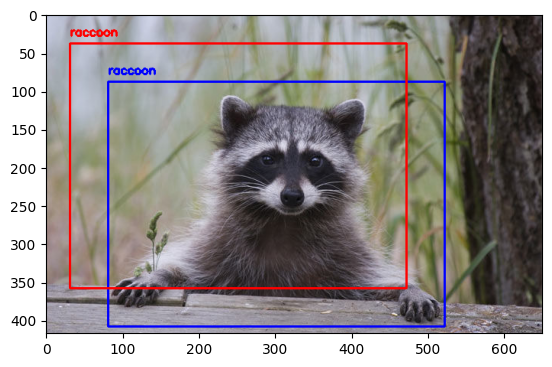

In [4]:
im = Image.open(image_path)
im_copy = np.array(im)
cv2.rectangle(im_copy, (box_label[0], box_label[1]),(box_label[2], box_label[3]), rectangle_color1, rectangle_thickness)
cv2.putText(im_copy, label, (text1_x, text1_y), font, font_scale, rectangle_color1, rectangle_thickness)
cv2.rectangle(im_copy, (box_pred[0], box_pred[1]),(box_pred[2], box_pred[3]), rectangle_color2, rectangle_thickness)
cv2.putText(im_copy, label, (text2_x, text2_y), font, font_scale, rectangle_color2, rectangle_thickness)
plt.imshow(im_copy)

In [10]:
def iou(boxes_preds, boxes_labels):
  box1_x1 = boxes_preds[0:1]
  box1_y1 = boxes_preds[1:2]
  box1_x2 = boxes_preds[2:3]
  box1_y2 = boxes_preds[3:4]
  box2_x1 = boxes_labels[0:1]
  box2_y1 = boxes_labels[1:2]
  box2_x2 = boxes_labels[2:3]
  box2_y2 = boxes_labels[3:4]

  x1 = torch.max(box1_x1, box2_x1)
  y1 = torch.max(box1_y1, box2_y1)
  x2 = torch.min(box1_x2, box2_x2)
  y2 = torch.min(box1_y2, box2_y2)
  #If there's no intersection between the two rectangles, the .clamp(0) will ensure that both the width and height are set to 0
  intersection = (x2 - x1).clamp(0) * (y2 - y1).clamp(0)

  box1_area = abs((box1_x2 - box1_x1) * (box1_y1 - box1_y2))
  box2_area = abs((box2_x2 - box2_x1) * (box2_y1 - box2_y2))

  return intersection / (box1_area + box2_area - intersection)

In [6]:
box_pred_tensor = torch.tensor(box_pred)
box_label_tensor = torch.tensor(box_label)

In [9]:
result = iou(box_pred_tensor, box_label_tensor)
print(f"IOU = {result[0]} ")

IOU = 0.5975547432899475 
